# Aprendizaje No Supervisado

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 

In [2]:
mainpath = "../Datasets/"
filename = "HVAC.xlsx"
fullpath = os.path.join(mainpath, filename)

In [3]:
data = pd.read_excel(fullpath, "HISTORICO_DATOS")

In [4]:
data2 = data
variables_a_eliminar = ["C_O_P_ BOMBA CALOR FELIPE", "C_O_P_ BOMBA CALOR CARLOS",
                        "C_O_P_ INSTALACIÓN GRUPO FRÍO 1", "C_O_P_ INSTALACÍON GRUPO FRÍO 2",
                        "ORDEN", "VÁLVULA BY PASS SECUNDARIO FRÍO",
                        "TEMPERATURA CONTROL DE BY PASS SECUNDARIO", "SECUNDARIO FRÍO 1",
                        "SECUNDARIO FRÍO 2", "SECUNDARIO FRÍO 3", "MODO INVIERNO BC1", 
                        "MODO INVIERNO BC2", "PERIODO P6", "CONTROL CALOR", 
                        "CAPACIDAD BOMBA CALOR FELIPE %", "CAPACIDAD BOMBA CALOR CARLOS %",
                        "CAPACIDAD GRUPO DE FRÍO 1"," CAPACIDAD GRUPO DE FRÍO 2",
                        "IMPULSIÓN SECUNDARIO CALOR", "SECUNDARIO CALOR 1", 
                        "SECUNDARIO CALOR 2", "SECUNDARIO CALOR 3",
                        "Fecha- hora de lectura"]
lista_variables = data2.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]
data2 = data2[subLista]

In [5]:
data3 = data2
data3["POTENCIA TERMICA BOMBA CALOR CARLOS"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS"] * 0.001163
data3["POTENCIA TERMICA BOMBA CALOR FELIPE"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 1"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 2"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2"] * 0.001163

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [14]:
dataCarlos = data3[['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR CARLOS']]
dataCarlos.describe()

,POTENCIA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR CARLOS,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR CARLOS
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,33.616413,132.154739,15.083257,29.447289
std,43.907480,149.917857,11.345877,13.676912
min,0.000000,0.000000,-1.400000,0.000000
25%,0.480000,9.877769,6.968000,16.940001
50%,0.500000,46.868723,13.353139,34.740002
75%,67.599998,255.914298,23.717333,42.450001
max,164.206665,592.614391,43.799999,47.889999


## Cargando dataset limpio para ver el comportamiento de los datos normales

In [7]:
dataLimpia = pd.read_excel("../Datasets/HVAC_limpio.xlsx", "HVAC_limpio", index_col=0)

In [15]:
dataCarlosLimpio = dataLimpia[['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR CARLOS', 'C_O_P BOMBA CALOR CARLOS']]
dataCarlosLimpio.describe()

,POTENCIA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR CARLOS,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR CARLOS,C_O_P BOMBA CALOR CARLOS
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000
mean,33.982880,134.031192,18.708072,29.768307,3.643607
std,43.766966,149.088492,8.605477,13.326841,0.377911
min,0.026667,0.251979,-1.400000,0.420000,1.785044
25%,0.480000,10.583311,11.900000,17.400000,3.643607
50%,0.500000,49.993504,18.708072,34.740002,3.643607
75%,67.599998,255.914298,23.717333,42.450001,3.660718
max,164.206665,592.614391,43.799999,47.889999,5.413333


## KMeans

El algoritmo trabaja iterativamente para asignar a cada dato uno de los K grupos basadose en sus características, es decir, son agrupados en base a la similitud de sus features (las columnas).
Los grupos se van definiendo en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los *centroids* deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos.

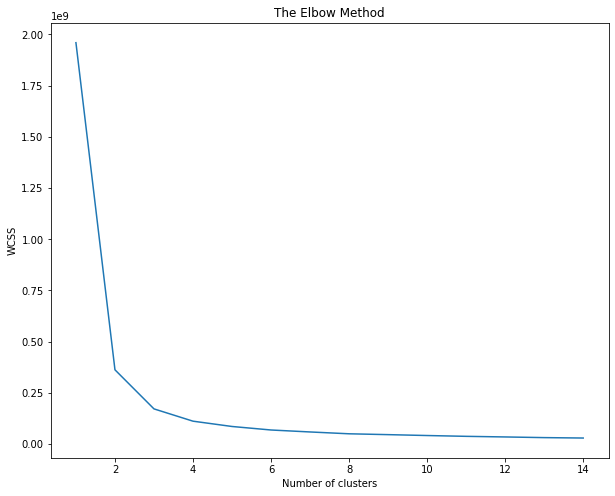

In [16]:
from sklearn.cluster import KMeans
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(dataCarlos)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataCarlos)
centroids = kmeans.cluster_centers_

In [54]:
dataTest = [[89.76533508, 334.5329885, 18.70807174, 44.03733444]] #datos buenos COP=3.79 linea 37760 dataset limpio
dataTest2 = [[6.22666645050049, 181.58, 33.02, 13.9333333969116]] #datos malos COP=16.46, linea 22288 dataset sin limpiar

In [55]:
centroids

array([[  2.37996074,  21.65339402,  15.93358591,  25.72050007],
       [ 82.95569293, 303.24896487,  14.84073723,  35.1226742 ],
       [ 42.10313623, 171.27001545,  14.24496806,  32.21407766],
       [122.38449207, 439.60726892,  11.40660776,  37.88442524]])

In [56]:
#El método predict me dice ese conjunto de datos a qué cluster pertenece(los puntos a dónde son más cercanos).
clusters = kmeans.predict(dataTest2)
clusters

array([2], dtype=int32)

In [57]:
def diagnosticoFallos(cluster):
    minPotenciaCarlos = 0.02 
    maxPotenciaCarlos = 34
    minPotenciaTermicaCarlos = 0.2 
    maxPotenciaTermicaCarlos = 134
    minTempExterior = 10
    maxTempExterior = 28
    minTempSalidaCarlos = 17
    maxTempSalidaCarlos = 43
    '''length = len(centroids)
    for i in range(length):
        if not ((centroids[i][0] > minPotenciaCarlos) and (centroids[i][0] <= maxPotenciaCarlos)):
            print('cluster ', i+1, ' anomalo')
        elif not ((centroids[i][1] > minPotenciaTermicaCarlos) and (centroids[i][1] <= maxPotenciaTermicaCarlos)):
            print('cluster ', i+1, ' anomalo')
        elif not ((centroids[i][2] > minTempExterior) and (centroids[i][2] <= maxTempExterior)):
            print('cluster ', i+1, ' anomalo')
        elif not ((centroids[i][3] > minTempSalidaCarlos) and (centroids[i][3] <= maxTempSalidaCarlos)):
            print('cluster ', i+1, ' anomalo')
        else:
            print('cluster ', i+1, ' bueno')'''
    if not ((centroids[cluster][0] > minPotenciaCarlos) and (centroids[cluster][0] <= maxPotenciaCarlos)):
        print('Revisar la POTENCIA BOMBA CALOR CARLOS.')
    if not ((centroids[cluster][1] > minPotenciaTermicaCarlos) and (centroids[cluster][1] <= maxPotenciaTermicaCarlos)):
        print('Revisar la POTENCIA TERMICA BOMBA CALOR CARLOS.')
    if not ((centroids[cluster][2] > minTempExterior) and (centroids[cluster][2] <= maxTempExterior)):
        print('Revisar la TEMPERATURA EXTERIOR.')
    if not ((centroids[cluster][3] > minTempSalidaCarlos) and (centroids[cluster][3] <= maxTempSalidaCarlos)):
        print('Revisar la TEMPERATURA SALIDA BOMBA CALOR CARLOS.')

In [58]:
for cluster in clusters:
    diagnosticoFallos(cluster)

Revisar la POTENCIA BOMBA CALOR CARLOS.
Revisar la POTENCIA TERMICA BOMBA CALOR CARLOS.
